In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overall View

In [2]:
exp_results = pd.read_csv('horses-result-comparison.csv')

exp_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
0,0,DT,NaN,random-absolute,NaN,NaN,53.27,51.4,abnormal,True,NaN
1,1,DT,NaN,random-relative,NaN,NaN,56.67,56.6,normal,True,NaN
2,2,DT,NaN,first-absolute,NaN,NaN,63.31,59.0,abnormal,True,NaN
3,3,DT,NaN,first-relative,NaN,NaN,60.00,58.3,abnormal,True,NaN
4,4,SVM,hypertangent,random-absolute,drop,decimal,NaN,NaN,NaN,False,Invalid partitioning resulting in a training d...
...,...,...,...,...,...,...,...,...,...,...,...
71,71,SVM,rbf,first-relative,drop,min-max,NaN,NaN,NaN,False,Testing dataset is empty.
72,72,SVM,rbf,first-relative,drop,z-score,NaN,NaN,NaN,False,Testing dataset is empty.
73,73,SVM,rbf,first-relative,mean,decimal,60.00,58.2,abnormal,False,NaN
74,74,SVM,rbf,first-relative,mean,min-max,60.00,56.1,abnormal,False,NaN


In [3]:
exp_results = exp_results[~exp_results['f1-score'].isna()]

exp_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
0,0,DT,NaN,random-absolute,NaN,NaN,53.27,51.4,abnormal,True,NaN
1,1,DT,NaN,random-relative,NaN,NaN,56.67,56.6,normal,True,NaN
2,2,DT,NaN,first-absolute,NaN,NaN,63.31,59.0,abnormal,True,NaN
3,3,DT,NaN,first-relative,NaN,NaN,60.00,58.3,abnormal,True,NaN
6,6,SVM,hypertangent,random-absolute,drop,z-score,25.00,62.5,abnormal,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
68,68,SVM,rbf,first-absolute,mean,min-max,62.81,53.1,abnormal,False,NaN
69,69,SVM,rbf,first-absolute,mean,z-score,61.81,51.7,abnormal,True,NaN
73,73,SVM,rbf,first-relative,mean,decimal,60.00,58.2,abnormal,False,NaN
74,74,SVM,rbf,first-relative,mean,min-max,60.00,56.1,abnormal,False,NaN


In [4]:
exp_mean = exp_results['accuracy-score'].mean()
exp_min = exp_results['accuracy-score'].min()
exp_max = exp_results['accuracy-score'].max()

expb_mean = exp_results['balanced-accuracy-score'].mean()
expb_min = exp_results['balanced-accuracy-score'].min()
expb_max = exp_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {exp_mean}, Min: {exp_min}, Max: {exp_max}')
print(f'Experiment Stats -- Mean: {expb_mean}, Min: {expb_min}, Max: {expb_max}')
print(f'Dimensions: {exp_results.shape}')

Experiment Stats -- Mean: 48.47327868852459, Min: 0.0, Max: 100.0
Experiment Stats -- Mean: 47.68934426229507, Min: 0.0, Max: 66.6
Dimensions: (61, 11)


In [5]:
opt_results = exp_results[exp_results['optimized']==True]
opt_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
0,0,DT,NaN,random-absolute,NaN,NaN,53.27,51.4,abnormal,True,NaN
1,1,DT,NaN,random-relative,NaN,NaN,56.67,56.6,normal,True,NaN
2,2,DT,NaN,first-absolute,NaN,NaN,63.31,59.0,abnormal,True,NaN
3,3,DT,NaN,first-relative,NaN,NaN,60.00,58.3,abnormal,True,NaN
9,9,SVM,hypertangent,random-absolute,mean,z-score,56.78,53.3,normal,True,NaN
15,15,SVM,hypertangent,random-relative,mean,z-score,66.67,60.6,normal,True,NaN
21,21,SVM,hypertangent,first-absolute,mean,z-score,60.30,56.7,abnormal,True,NaN
27,27,SVM,hypertangent,first-relative,mean,z-score,58.30,59.2,abnormal,True,NaN
33,33,SVM,polynomial,random-absolute,mean,z-score,64.82,61.4,normal,True,NaN
39,39,SVM,polynomial,random-relative,mean,z-score,83.33,66.6,abnormal,True,NaN


In [6]:
opt_mean = opt_results['accuracy-score'].mean()
opt_min = opt_results['accuracy-score'].min()
opt_max = opt_results['accuracy-score'].max()

optb_mean = opt_results['balanced-accuracy-score'].mean()
optb_min = opt_results['balanced-accuracy-score'].min()
optb_max = opt_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {opt_mean}, Min: {opt_min}, Max: {opt_max}')
print(f'Experiment Stats -- Mean: {optb_mean}, Min: {optb_min}, Max: {optb_max}')
print(f'Dimensions: {opt_results.shape}')

Experiment Stats -- Mean: 61.260000000000005, Min: 53.27, Max: 83.33
Experiment Stats -- Mean: 56.8375, Min: 50.0, Max: 66.6
Dimensions: (16, 11)


In [7]:
dt_results = exp_results[exp_results['classification-algorithm']=="DT"]
dt_results



,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
0,0,DT,NaN,random-absolute,NaN,NaN,53.27,51.4,abnormal,True,NaN
1,1,DT,NaN,random-relative,NaN,NaN,56.67,56.6,normal,True,NaN
2,2,DT,NaN,first-absolute,NaN,NaN,63.31,59.0,abnormal,True,NaN
3,3,DT,NaN,first-relative,NaN,NaN,60.00,58.3,abnormal,True,NaN


In [8]:
dt_mean = dt_results['accuracy-score'].mean()
dt_min = dt_results['accuracy-score'].min()
dt_max = dt_results['accuracy-score'].max()

dtb_mean = dt_results['balanced-accuracy-score'].mean()
dtb_min = dt_results['balanced-accuracy-score'].min()
dtb_max = dt_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {dt_mean}, Min: {dt_min}, Max: {dt_max}')
print(f'Experiment Stats -- Mean: {dtb_mean}, Min: {dtb_min}, Max: {dtb_max}')
print(f'Dimensions: {dt_results.shape}')

Experiment Stats -- Mean: 58.3125, Min: 53.27, Max: 63.31
Experiment Stats -- Mean: 56.325, Min: 51.4, Max: 59.0
Dimensions: (4, 11)


In [9]:
svm_results = exp_results[exp_results['classification-algorithm']=="SVM"]
svm_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
6,6,SVM,hypertangent,random-absolute,drop,z-score,25.00,62.50,abnormal,False,NaN
7,7,SVM,hypertangent,random-absolute,mean,decimal,59.80,50.00,abnormal,False,NaN
8,8,SVM,hypertangent,random-absolute,mean,min-max,60.30,50.00,abnormal,False,NaN
9,9,SVM,hypertangent,random-absolute,mean,z-score,56.78,53.30,normal,True,NaN
10,10,SVM,hypertangent,random-relative,drop,decimal,0.00,50.00,abnormal,False,NaN
11,11,SVM,hypertangent,random-relative,drop,min-max,0.00,0.00,abnormal,False,NaN
12,12,SVM,hypertangent,random-relative,drop,z-score,0.00,0.00,abnormal,False,NaN
13,13,SVM,hypertangent,random-relative,mean,decimal,58.33,50.00,abnormal,False,NaN
14,14,SVM,hypertangent,random-relative,mean,min-max,61.67,50.00,abnormal,False,NaN
15,15,SVM,hypertangent,random-relative,mean,z-score,66.67,60.60,normal,True,NaN


In [10]:
svm_mean = svm_results['accuracy-score'].mean()
svm_min = svm_results['accuracy-score'].min()
svm_max = svm_results['accuracy-score'].max()

svmb_mean = svm_results['balanced-accuracy-score'].mean()
svmb_min = svm_results['balanced-accuracy-score'].min()
svmb_max = svm_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {svm_mean}, Min: {svm_min}, Max: {svm_max}')
print(f'Experiment Stats -- Mean: {svmb_mean}, Min: {svmb_min}, Max: {svmb_max}')
print(f'Dimensions: {svm_results.shape}')

Experiment Stats -- Mean: 47.78280701754386, Min: 0.0, Max: 100.0
Experiment Stats -- Mean: 47.083333333333336, Min: 0.0, Max: 66.6
Dimensions: (57, 11)


In [11]:
opt_svm_results = svm_results[svm_results['optimized']==True]
opt_svm_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
9,9,SVM,hypertangent,random-absolute,mean,z-score,56.78,53.3,normal,True,NaN
15,15,SVM,hypertangent,random-relative,mean,z-score,66.67,60.6,normal,True,NaN
21,21,SVM,hypertangent,first-absolute,mean,z-score,60.30,56.7,abnormal,True,NaN
27,27,SVM,hypertangent,first-relative,mean,z-score,58.30,59.2,abnormal,True,NaN
33,33,SVM,polynomial,random-absolute,mean,z-score,64.82,61.4,normal,True,NaN
39,39,SVM,polynomial,random-relative,mean,z-score,83.33,66.6,abnormal,True,NaN
45,45,SVM,polynomial,first-absolute,mean,z-score,61.30,58.7,abnormal,True,NaN
51,51,SVM,polynomial,first-relative,mean,z-score,65.00,63.9,abnormal,True,NaN
57,57,SVM,rbf,random-absolute,mean,z-score,60.30,50.5,abnormal,True,NaN
63,63,SVM,rbf,random-relative,mean,z-score,53.30,50.0,abnormal,True,NaN


In [12]:
opt_svm_mean = opt_svm_results['accuracy-score'].mean()
opt_svm_min = opt_svm_results['accuracy-score'].min()
opt_svm_max = opt_svm_results['accuracy-score'].max()

optb_svm_mean = opt_svm_results['balanced-accuracy-score'].mean()
optb_svm_min = opt_svm_results['balanced-accuracy-score'].min()
optb_svm_max = opt_svm_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {opt_svm_mean}, Min: {opt_svm_min}, Max: {opt_svm_max}')
print(f'Experiment Stats -- Mean: {optb_svm_mean}, Min: {optb_svm_min}, Max: {optb_svm_max}')
print(f'Dimensions: {opt_svm_results.shape}')

Experiment Stats -- Mean: 62.242499999999986, Min: 53.3, Max: 83.33
Experiment Stats -- Mean: 57.00833333333333, Min: 50.0, Max: 66.6
Dimensions: (12, 11)


/tmp/ipykernel_982636/3082467574.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workflow Category', y='Balanced Accuracy', data=df, palette="Set2")


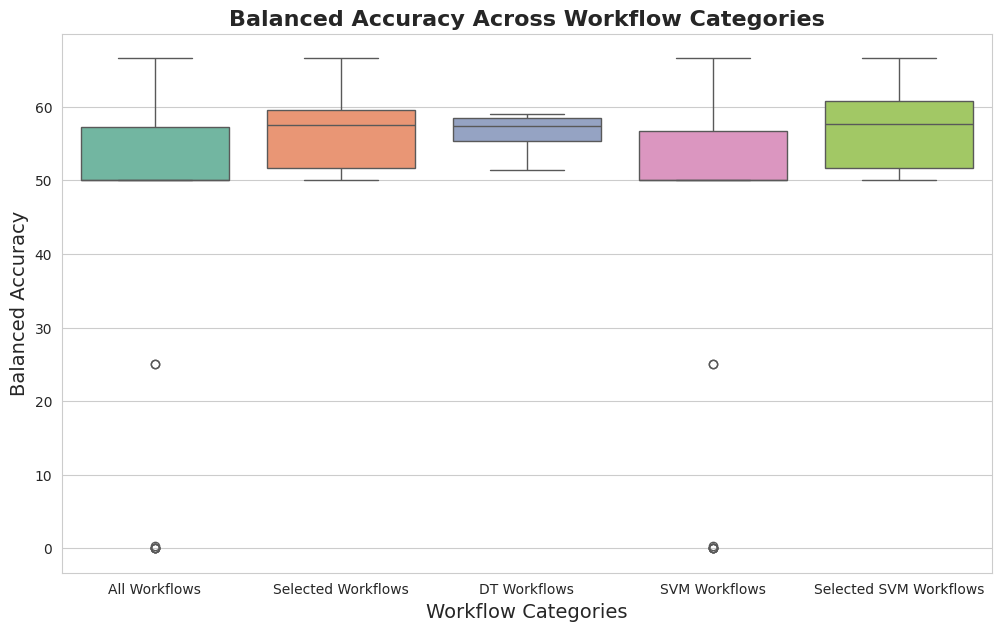

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Balanced Accuracy': (
        list(exp_results['balanced-accuracy-score']) +
        list(opt_results['balanced-accuracy-score']) +
        list(dt_results['balanced-accuracy-score']) +
        list(svm_results['balanced-accuracy-score']) +
        list(opt_svm_results['balanced-accuracy-score'])
    ),
    'Workflow Category': (
        ['All Workflows'] * len(exp_results['balanced-accuracy-score']) +
        ['Selected Workflows'] * len(opt_results['balanced-accuracy-score']) +
        ['DT Workflows'] * len(dt_results['balanced-accuracy-score']) +
        ['SVM Workflows'] * len(svm_results['balanced-accuracy-score']) +
        ['Selected SVM Workflows'] * len(opt_svm_results['balanced-accuracy-score'])
    )
}

df = pd.DataFrame(data)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.boxplot(x='Workflow Category', y='Balanced Accuracy', data=df, palette="Set2")

plt.title('Balanced Accuracy Across Workflow Categories', fontsize=16, fontweight='bold')
plt.xlabel('Workflow Categories', fontsize=14)
plt.ylabel('Balanced Accuracy', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Overall View (with Eliminating Invalid Classifiers)

In [14]:
clean_exp_results = exp_results[exp_results['f1-score']=="normal"]

clean_exp_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
1,1,DT,NaN,random-relative,NaN,NaN,56.67,56.6,normal,True,NaN
9,9,SVM,hypertangent,random-absolute,mean,z-score,56.78,53.3,normal,True,NaN
15,15,SVM,hypertangent,random-relative,mean,z-score,66.67,60.6,normal,True,NaN
33,33,SVM,polynomial,random-absolute,mean,z-score,64.82,61.4,normal,True,NaN
55,55,SVM,rbf,random-absolute,mean,decimal,61.81,60.2,normal,False,NaN
67,67,SVM,rbf,first-absolute,mean,decimal,66.33,59.5,normal,False,NaN


In [15]:
clean_exp_results.shape

(6, 11)

In [16]:
clean_exp_mean = clean_exp_results['accuracy-score'].mean()
clean_exp_min = clean_exp_results['accuracy-score'].min()
clean_exp_max = clean_exp_results['accuracy-score'].max()

clean_expb_mean = clean_exp_results['balanced-accuracy-score'].mean()
clean_expb_min = clean_exp_results['balanced-accuracy-score'].min()
clean_expb_max = clean_exp_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {clean_exp_mean}, Min: {clean_exp_min}, Max: {clean_exp_max}')
print(f'Experiment Stats -- Mean: {clean_expb_mean}, Min: {clean_expb_min}, Max: {clean_expb_max}')
print(f'Dimensions: {clean_exp_results.shape}')

Experiment Stats -- Mean: 62.18, Min: 56.67, Max: 66.67
Experiment Stats -- Mean: 58.6, Min: 53.3, Max: 61.4
Dimensions: (6, 11)


In [17]:
clean_opt_results = clean_exp_results[clean_exp_results['optimized']==True]
clean_opt_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
1,1,DT,NaN,random-relative,NaN,NaN,56.67,56.6,normal,True,NaN
9,9,SVM,hypertangent,random-absolute,mean,z-score,56.78,53.3,normal,True,NaN
15,15,SVM,hypertangent,random-relative,mean,z-score,66.67,60.6,normal,True,NaN
33,33,SVM,polynomial,random-absolute,mean,z-score,64.82,61.4,normal,True,NaN


In [18]:
clean_opt_mean = clean_opt_results['accuracy-score'].mean()
clean_opt_min = clean_opt_results['accuracy-score'].min()
clean_opt_max = clean_opt_results['accuracy-score'].max()

clean_optb_mean = clean_opt_results['balanced-accuracy-score'].mean()
clean_optb_min = clean_opt_results['balanced-accuracy-score'].min()
clean_optb_max = clean_opt_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {clean_opt_mean}, Min: {clean_opt_min}, Max: {clean_opt_max}')
print(f'Experiment Stats -- Mean: {clean_optb_mean}, Min: {clean_optb_min}, Max: {clean_optb_max}')
print(f'Dimensions: {clean_opt_results.shape}')

Experiment Stats -- Mean: 61.235, Min: 56.67, Max: 66.67
Experiment Stats -- Mean: 57.975, Min: 53.3, Max: 61.4
Dimensions: (4, 11)


In [19]:
clean_svm_results = clean_exp_results[clean_exp_results['classification-algorithm']=="SVM"]
clean_svm_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
9,9,SVM,hypertangent,random-absolute,mean,z-score,56.78,53.3,normal,True,NaN
15,15,SVM,hypertangent,random-relative,mean,z-score,66.67,60.6,normal,True,NaN
33,33,SVM,polynomial,random-absolute,mean,z-score,64.82,61.4,normal,True,NaN
55,55,SVM,rbf,random-absolute,mean,decimal,61.81,60.2,normal,False,NaN
67,67,SVM,rbf,first-absolute,mean,decimal,66.33,59.5,normal,False,NaN


In [20]:
grouped_df = clean_svm_results.groupby(['Imputation-component']).count()
grouped_df

,workflow-number,classification-algorithm,algorithm-component,partition-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
Imputation-component,,,,,,,,,,
mean,5,5,5,5,5,5,5,5,5,0


In [21]:
grouped_df_2 = clean_svm_results.groupby(['Imputation-component'])['balanced-accuracy-score'].mean()
grouped_df_2

Imputation-component
mean    59.0
Name: balanced-accuracy-score, dtype: float64

In [22]:
grouped_df_3 = clean_svm_results.groupby(['scaling-component']).count()
grouped_df_3

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
scaling-component,,,,,,,,,,
decimal,2,2,2,2,2,2,2,2,2,0
z-score,3,3,3,3,3,3,3,3,3,0


In [23]:
grouped_df_4 = clean_svm_results.groupby(['scaling-component'])['balanced-accuracy-score'].mean()
grouped_df_4

scaling-component
decimal    59.850000
z-score    58.433333
Name: balanced-accuracy-score, dtype: float64

In [24]:
grouped_df_4 = clean_svm_results.groupby(['optimized'])['balanced-accuracy-score'].mean()
grouped_df_4

optimized
False    59.850000
True     58.433333
Name: balanced-accuracy-score, dtype: float64

In [25]:
clean_svm_mean = clean_svm_results['accuracy-score'].mean()
clean_svm_min = clean_svm_results['accuracy-score'].min()
clean_svm_max = clean_svm_results['accuracy-score'].max()

clean_svmb_mean = clean_svm_results['balanced-accuracy-score'].mean()
clean_svmb_min = clean_svm_results['balanced-accuracy-score'].min()
clean_svmb_max = clean_svm_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {clean_svm_mean}, Min: {clean_svm_min}, Max: {clean_svm_max}')
print(f'Experiment Stats -- Mean: {clean_svmb_mean}, Min: {clean_svmb_min}, Max: {clean_svmb_max}')
print(f'Dimensions: {clean_svm_results.shape}')

Experiment Stats -- Mean: 63.282, Min: 56.78, Max: 66.67
Experiment Stats -- Mean: 59.0, Min: 53.3, Max: 61.4
Dimensions: (5, 11)


In [26]:
clean_opt_svm_results = clean_svm_results[clean_svm_results['optimized']==True]
clean_opt_svm_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
9,9,SVM,hypertangent,random-absolute,mean,z-score,56.78,53.3,normal,True,NaN
15,15,SVM,hypertangent,random-relative,mean,z-score,66.67,60.6,normal,True,NaN
33,33,SVM,polynomial,random-absolute,mean,z-score,64.82,61.4,normal,True,NaN


In [27]:
clean_opt_svm_mean = clean_opt_svm_results['accuracy-score'].mean()
clean_opt_svm_min = clean_opt_svm_results['accuracy-score'].min()
clean_opt_svm_max = clean_opt_svm_results['accuracy-score'].max()

clean_optb_svm_mean = clean_opt_svm_results['balanced-accuracy-score'].mean()
clean_optb_svm_min = clean_opt_svm_results['balanced-accuracy-score'].min()
clean_optb_svm_max = clean_opt_svm_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {clean_opt_svm_mean}, Min: {clean_opt_svm_min}, Max: {clean_opt_svm_max}')
print(f'Experiment Stats -- Mean: {clean_optb_svm_mean}, Min: {clean_optb_svm_min}, Max: {clean_optb_svm_max}')
print(f'Dimensions: {clean_opt_svm_results.shape}')

Experiment Stats -- Mean: 62.75666666666666, Min: 56.78, Max: 66.67
Experiment Stats -- Mean: 58.43333333333334, Min: 53.3, Max: 61.4
Dimensions: (3, 11)


In [28]:
clean_dt_results = clean_exp_results[clean_exp_results['classification-algorithm']=="DT"]
clean_dt_results

,workflow-number,classification-algorithm,algorithm-component,partition-component,Imputation-component,scaling-component,accuracy-score,balanced-accuracy-score,f1-score,optimized,reason
1,1,DT,NaN,random-relative,NaN,NaN,56.67,56.6,normal,True,NaN


In [29]:
clean_dt_mean = clean_dt_results['accuracy-score'].mean()
clean_dt_min = clean_dt_results['accuracy-score'].min()
clean_dt_max = clean_dt_results['accuracy-score'].max()

clean_dtb_mean = clean_dt_results['balanced-accuracy-score'].mean()
clean_dtb_min = clean_dt_results['balanced-accuracy-score'].min()
clean_dtb_max = clean_dt_results['balanced-accuracy-score'].max()

print(f'Experiment Stats -- Mean: {clean_dt_mean}, Min: {clean_dt_min}, Max: {clean_dt_max}')
print(f'Experiment Stats -- Mean: {clean_dtb_mean}, Min: {clean_dtb_min}, Max: {clean_dtb_max}')
print(f'Dimensions: {clean_dt_results.shape}')

Experiment Stats -- Mean: 56.67, Min: 56.67, Max: 56.67
Experiment Stats -- Mean: 56.6, Min: 56.6, Max: 56.6
Dimensions: (1, 11)


In [30]:
grouped_df_5 = clean_svm_results.groupby(['partition-component','Imputation-component','scaling-component'])['balanced-accuracy-score'].mean()
grouped_df_5

partition-component  Imputation-component  scaling-component
first-absolute       mean                  decimal              59.50
random-absolute      mean                  decimal              60.20
                                           z-score              57.35
random-relative      mean                  z-score              60.60
Name: balanced-accuracy-score, dtype: float64

In [31]:
grouped_df_6 = clean_opt_svm_results.groupby(['partition-component','Imputation-component','scaling-component'])['balanced-accuracy-score'].mean()
grouped_df_6

partition-component  Imputation-component  scaling-component
random-absolute      mean                  z-score              57.35
random-relative      mean                  z-score              60.60
Name: balanced-accuracy-score, dtype: float64

/tmp/ipykernel_982636/3516242389.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workflow Category', y='Balanced Accuracy', data=df, palette="Set2")


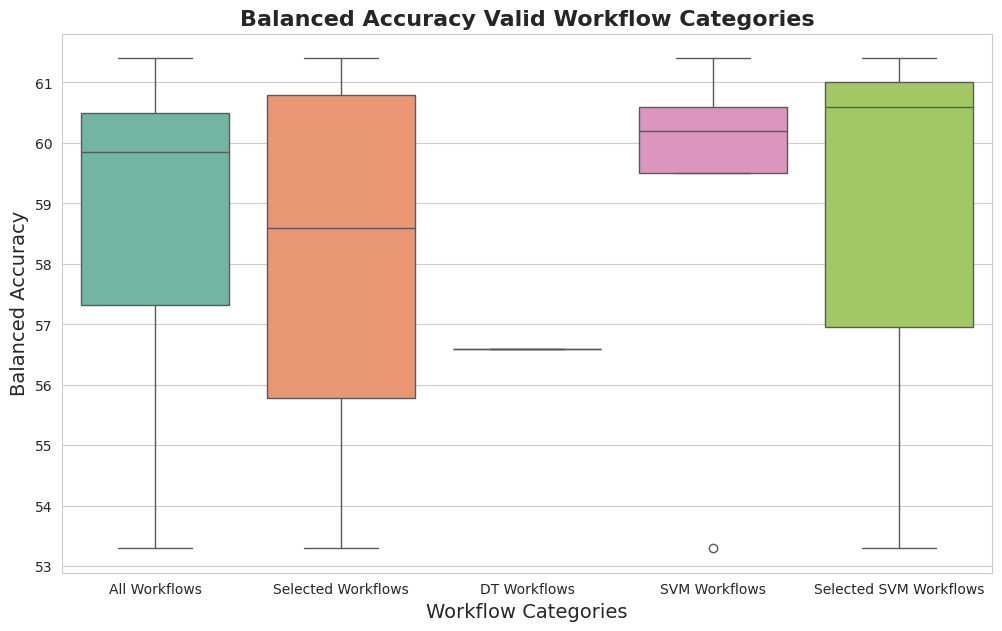

In [32]:
data = {
    'Balanced Accuracy': (
        list(clean_exp_results['balanced-accuracy-score']) +
        list(clean_opt_results['balanced-accuracy-score']) +
        list(clean_dt_results['balanced-accuracy-score']) +
        list(clean_svm_results['balanced-accuracy-score']) +
        list(clean_opt_svm_results['balanced-accuracy-score'])
    ),
    'Workflow Category': (
        ['All Workflows'] * len(clean_exp_results['balanced-accuracy-score']) +
        ['Selected Workflows'] * len(clean_opt_results['balanced-accuracy-score']) +
        ['DT Workflows'] * len(clean_dt_results['balanced-accuracy-score']) +
        ['SVM Workflows'] * len(clean_svm_results['balanced-accuracy-score']) +
        ['Selected SVM Workflows'] * len(clean_opt_svm_results['balanced-accuracy-score'])
    )
}

df = pd.DataFrame(data)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.boxplot(x='Workflow Category', y='Balanced Accuracy', data=df, palette="Set2")

plt.title('Balanced Accuracy Valid Workflow Categories', fontsize=16, fontweight='bold')
plt.xlabel('Workflow Categories', fontsize=14)
plt.ylabel('Balanced Accuracy', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()